# AE2 - Analysing Quantitative Data using Python

## Introduction : 
##### In England and Wales, the Office for National Statistics (ONS) has meticulously compiled data on baby names, offering a comprehensive repository of naming trends over the years. In this assignment, I embark on a journey of exploration and analysis, delving into the intricacies of this rich dataset. By employing various analytical methods, I endeavor to unravel the underlying patterns and trends that characterize the evolution of baby names. Through my analyses, I aim to gain a deeper understanding of how naming conventions for both boys and girls have shifted over time. It is imperative to acknowledge that while this dataset is a valuable resource, it is not without imperfections. However, through diligent data cleaning and preprocessing, I can enhance its reliability and robustness, ensuring that my analyses yield meaningful insights into the dynamic nature of baby naming practices in England and Wales.

## 1. Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #Importing important python libraries

file_path = "babynames1996to2021.xlsx" #Initiallising a variable to store the file for baby names

#### Pandas is a powerful and flexible Python package that allows you to work with labeled and time series data. (Python, R. (n.d.)). 

## 2. Data Cleaning and Preprocessing

In [2]:
class BabyNamesDataLoader:         #Creating a class BabyNamesDataloader for task 2 to accomodate repetitive tasks
    def __init__(self, file_path): #Initialising a function to store file path in a new variable to access for data loading
        self.file_path = file_path
    
    def load_data(self):
        df_boys = pd.read_excel(self.file_path, sheet_name="1", skiprows=7, header=0) #Initialising a data frame to store baby boy names and giving the sheet name and skipping rows to clean the data
        df_girls = pd.read_excel(self.file_path, sheet_name="2", skiprows=7, header=0) #Initialising a data frame to store baby girl names and giving the sheet name and skipping rows to clean the data
        return df_boys, df_girls #Returning the data frames
    
    def clean_data(self, df_boys, df_girls):
        count_columns_boys = [col for col in df_boys.columns if 'Count' in col] # Identify count and rank columns for boys and girls
        count_columns_girls = [col for col in df_girls.columns if 'Count' in col] 
        rank_columns_boys = [col for col in df_boys.columns if 'Rank' in col]
        rank_columns_girls = [col for col in df_girls.columns if 'Rank' in col]
        df_boys_cleaned = df_boys.copy()  # Creating copies of original DataFrames to avoid modifying the source data
        df_girls_cleaned = df_girls.copy()
        df_boys_cleaned[count_columns_boys] = df_boys_cleaned[count_columns_boys].replace('[x]', 0) #Replacing '[x]' values with appropriate placeholders (0 for count columns, pd.NA for rank columns)
        df_girls_cleaned[count_columns_girls] = df_girls_cleaned[count_columns_girls].replace('[x]', 0)
        df_boys_cleaned[rank_columns_boys] = df_boys_cleaned[rank_columns_boys].replace('[x]', pd.NA)
        df_girls_cleaned[rank_columns_girls] = df_girls_cleaned[rank_columns_girls].replace('[x]', pd.NA)
        df_boys_cleaned[rank_columns_boys] = df_boys_cleaned[rank_columns_boys].apply(pd.to_numeric) #Converting rank columns to numeric values
        df_girls_cleaned[rank_columns_girls] = df_girls_cleaned[rank_columns_girls].apply(pd.to_numeric)
        df_boys_cleaned[count_columns_boys] = df_boys_cleaned[count_columns_boys].apply(pd.to_numeric, errors='coerce') #Coercing count columns to numeric, handling any conversion errors by coercing them to NaN
        df_girls_cleaned[count_columns_girls] = df_girls_cleaned[count_columns_girls].apply(pd.to_numeric, errors='coerce')
        return df_boys_cleaned, df_girls_cleaned
    
data_loader = BabyNamesDataLoader(file_path) #Instantiating BabyNamesDataLoader with the file path
boys_data, girls_data = data_loader.load_data()
boys_data_cleaned, girls_data_cleaned = data_loader.clean_data(boys_data, girls_data)

print("Baby Boys' Names Dataset:") #Displaing the cleaned datasets
display(boys_data.head())

print("\n Baby Girls' Names Dataset:")
display(girls_data.head())

Baby Boys' Names Dataset:


,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A,3451,5,3848,4,2104,10,3959,4,3996,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
1,A-Jay,3451,5,2960,6,[x],[x],3011,6,1923,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
2,A.J.,[x],[x],[x],[x],[x],[x],[x],[x],[x],...,[x],[x],2943,3,[x],[x],[x],[x],[x],[x]
3,Aaban,3990,4,3848,4,3937,4,3412,5,2324,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
4,Aabid,[x],[x],4608,3,3937,4,3959,4,3996,...,2142,5,[x],[x],2901,3,[x],[x],[x],[x]



 Baby Girls' Names Dataset:


,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A'Idah,[x],[x],[x],[x],4686,4,[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
1,A'Isha,5581,3,[x],[x],2458,10,[x],[x],4763,...,[x],[x],[x],[x],3142,4,[x],[x],[x],[x]
2,A'Ishah,4634,4,[x],[x],[x],[x],[x],[x],5765,...,3912,3,3225,4,3142,4,[x],[x],[x],[x]
3,A'Niyah,[x],[x],[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
4,Aa'Idah,4634,4,[x],[x],[x],[x],[x],[x],[x],...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]


##### The presented code encapsulates a class called BabyNamesDataLoader, designed to facilitate the loading and cleaning of baby names data sourced from an Excel file. Excel sheets are very instinctive and user-friendly, which makes them ideal for manipulating large datasets.(GeeksforGeeks. (2020)). Within this class, two methods are defined: load_data, responsible for loading the raw data from the specified Excel file, and clean_data, which processes and prepares the loaded data for analysis by handling tasks such as replacing missing values and converting data types. Following the definition of the class, an instance of BabyNamesDataLoader is instantiated with a file path pointing to the desired Excel file. Subsequently, the load_data and clean_data methods are invoked on this instance to load the raw data and apply the necessary cleaning procedures. Finally, the cleaned datasets for both boys and girls are displayed to provide a glimpse into the refined data that is now ready for further analysis. This structured approach to data loading and cleaning ensures that the datasets are prepared in a consistent and reliable manner, laying a solid foundation for subsequent analytical tasks. We can automate the process of performing data manipulations in Python. It's efficient to spend time building the code to perform these tasks because once it's built, we can use it over and over on different datasets that use a similar format. (monashdatafluency.github.io. (n.d.)). 

In [3]:
print("Baby Boys' Names Dataset:") #Printing the clean data frames by calling the function and showing the first few rows using 'head'
display(boys_data_cleaned.head())
print("\n Baby Girls' Names Dataset:")
display(girls_data_cleaned.head())

Baby Boys' Names Dataset:


,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A,3451.0,5,3848.0,4,2104.0,10,3959.0,4,3996.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,A-Jay,3451.0,5,2960.0,6,NaN,0,3011.0,6,1923.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,A.J.,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,2943.0,3,NaN,0,NaN,0,NaN,0
3,Aaban,3990.0,4,3848.0,4,3937.0,4,3412.0,5,2324.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,Aabid,NaN,0,4608.0,3,3937.0,4,3959.0,4,3996.0,...,2142.0,5,NaN,0,2901.0,3,NaN,0,NaN,0



 Baby Girls' Names Dataset:


,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A'Idah,NaN,0,NaN,0,4686.0,4,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,A'Isha,5581.0,3,NaN,0,2458.0,10,NaN,0,4763.0,...,NaN,0,NaN,0,3142.0,4,NaN,0,NaN,0
2,A'Ishah,4634.0,4,NaN,0,NaN,0,NaN,0,5765.0,...,3912.0,3,3225.0,4,3142.0,4,NaN,0,NaN,0
3,A'Niyah,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,Aa'Idah,4634.0,4,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


## 3. Data Analysis

### 1. Names whose popularity has increased or decreased the most in the years covered in the data set 

In [4]:
boys_data_cleaned['Total Count'] = boys_data_cleaned[[col for col in boys_data_cleaned.columns if 'Count' in col]].sum(axis=1) #Calculate total count for each year by summing counts across all columns containing 'Count' in their names
girls_data_cleaned['Total Count'] = girls_data_cleaned[[col for col in girls_data_cleaned.columns if 'Count' in col]].sum(axis=1)
boys_data_cleaned['Count Change'] = boys_data_cleaned['2021 Count'] - boys_data_cleaned['1996 Count'] #Calculate count change from 1996 to 2021 for each name
girls_data_cleaned['Count Change'] = girls_data_cleaned['2021 Count'] - girls_data_cleaned['1996 Count']
most_increased_boys = boys_data_cleaned.nlargest(10, 'Count Change') #Finding the top 10 names with the highest increase and decrease in popularity for boys and girls
most_decreased_boys = boys_data_cleaned.nsmallest(10, 'Count Change')
most_increased_girls = girls_data_cleaned.nlargest(10, 'Count Change')
most_decreased_girls = girls_data_cleaned.nsmallest(10, 'Count Change')
print("Top 10 Names with the Highest Increase in Popularity (Boys):") #Printing the top 10 names with the highest increase and decrease in popularity for boys and girls
print(most_increased_boys[['Name', 'Count Change']])
print("\nTop 10 Names with the Highest Decrease in Popularity (Boys):")
print(most_decreased_boys[['Name', 'Count Change']])
print("\nTop 10 Names with the Highest Increase in Popularity (Girls):")
print(most_increased_girls[['Name', 'Count Change']])
print("\nTop 10 Names with the Highest Decrease in Popularity (Girls):")
print(most_decreased_girls[['Name', 'Count Change']])

Top 10 Names with the Highest Increase in Popularity (Boys):
           Name  Count Change
11488      Noah          4388
1633     Arthur          3637
9370        Leo          3316
10859  Muhammad          3281
5328    Freddie          2784
11923     Oscar          2764
1402     Archie          2759
15232  Theodore          2737
15221      Theo          2394
5198     Finley          2261

Top 10 Names with the Highest Decrease in Popularity (Boys):
          Name  Count Change
3632    Daniel         -9188
6882      Jack         -7932
7126     James         -7613
15256   Thomas         -7301
10233  Matthew         -6954
7768    Joshua         -6150
13462     Ryan         -5927
7724    Jordan         -5512
9714      Luke         -5168
9467      Liam         -5112

Top 10 Names with the Highest Increase in Popularity (Girls):
           Name  Count Change
8782       Isla          2596
2665        Ava          2546
1401     Amelia          2235
8885        Ivy          2230
21251    Willow

##### The provided code segment helps in examining the fluctuating popularity levels of baby names over time. Initially, it undertakes the crucial task of aggregating the total count of each name across all available years, spanning from 1996 to 2021. This aggregation process yields a comprehensive overview of the overall popularity trends associated with individual names. Moreover, the code meticulously calculates the count change for each name by subtracting its count in 1996 from the count recorded in 2021. This insightful metric offers a nuanced perspective on the trajectory of popularity, shedding light on whether a name has experienced a surge or decline in favor over the specified timeframe. Subsequently, the code proceeds to identify and present the top 10 names that have witnessed the most significant increases and decreases in popularity, delineated separately for boys and girls. Through this focused analysis, the code endeavors to uncover noteworthy patterns and shifts in naming preferences, potentially serving as a reflection of broader societal dynamics and cultural influences. By elucidating these trends, the analysis aspires to provide valuable insights into the evolving landscape of baby naming practices, thereby contributing to a deeper understanding of social trends and preferences across different time periods.

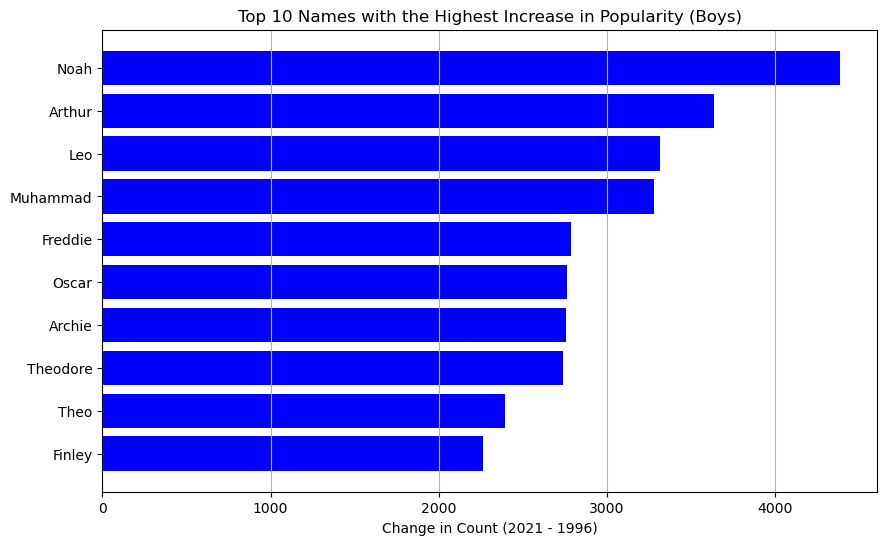

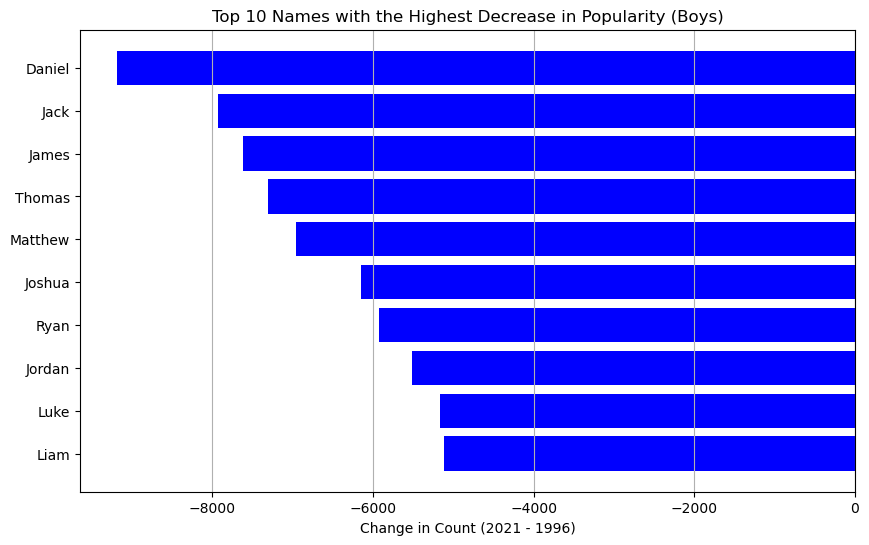

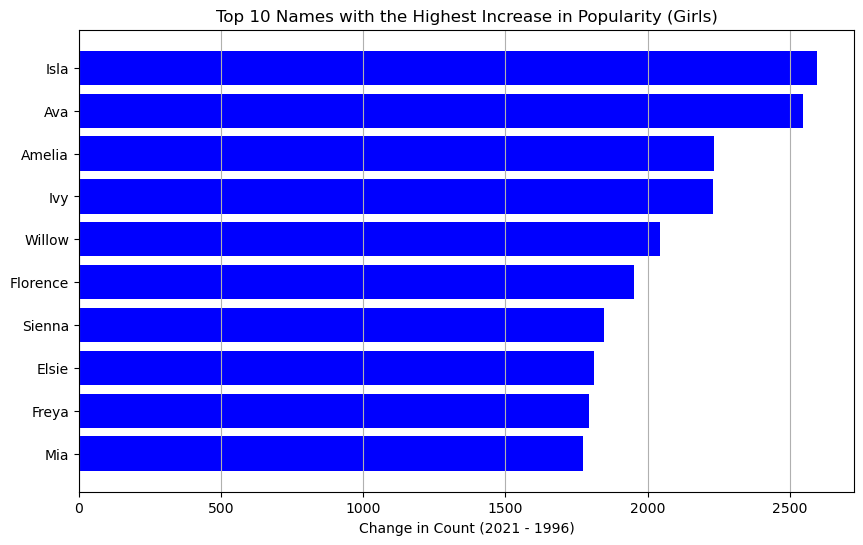

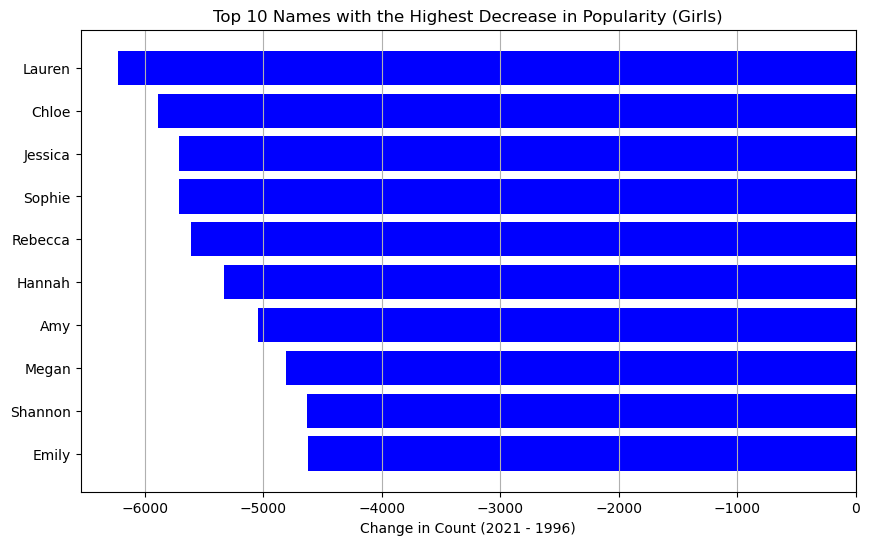

In [5]:
def plot_top_names(names_df, title): #Defining a function for plotting top names
    plt.figure(figsize=(10, 6))
    plt.barh(names_df['Name'], names_df['Count Change'], color='blue') #Setting up the horizontal bar plot
    plt.xlabel('Change in Count (2021 - 1996)')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest change at the top
    plt.grid(axis='x')
    plt.show()
    
plot_top_names(most_increased_boys, 'Top 10 Names with the Highest Increase in Popularity (Boys)') #Plotting the top names with the highest increase and decrease in popularity for boys and girls
plot_top_names(most_decreased_boys, 'Top 10 Names with the Highest Decrease in Popularity (Boys)')
plot_top_names(most_increased_girls, 'Top 10 Names with the Highest Increase in Popularity (Girls)')
plot_top_names(most_decreased_girls, 'Top 10 Names with the Highest Decrease in Popularity (Girls)')

##### This function plot the top 10 names with the highest increase and decrease in popularity for both boys and girls. The plot_top_names function takes a DataFrame containing the top names and their count change as input, along with a title for the plot. It then creates a horizontal bar plot where the names are plotted along the y-axis and the count change (2021 - 1996) is plotted along the x-axis. The y-axis is inverted to display the names with the highest change at the top. Grid lines are added along the x-axis for better visualization. Finally, the function displays the plot.

### 2. Names that are popular with both boys and girls

In [6]:
common_names_df = pd.merge(boys_data_cleaned[['Name']], girls_data_cleaned[['Name']], on='Name', how='inner') #Merging the cleaned boys and girls datasets on the 'Name' column to find common names
print("Common Names for Boys and Girls:") #Printing the common names for Baby boys and girls
print(common_names_df)

Common Names for Boys and Girls:
        Name
0      Aadya
1      Aarya
2      Abeer
3       Abel
4       Abie
...      ...
2319    Zola
2320    Zora
2321    Zuri
2322  Zuriel
2323    Zyah

[2324 rows x 1 columns]


In [7]:
common_names_counts = common_names_df['Name'].value_counts() #Counting occurrences of each common name
print("Top Names for Both Boys and Girls:") #Printing the top 10 common names for both boys and girls
print(common_names_counts.head(10))

Top Names for Both Boys and Girls:
Name
Aadya     1
Nihan     1
Noel      1
Noha      1
Noor      1
Noorul    1
North     1
Nour      1
Nova      1
Novah     1
Name: count, dtype: int64


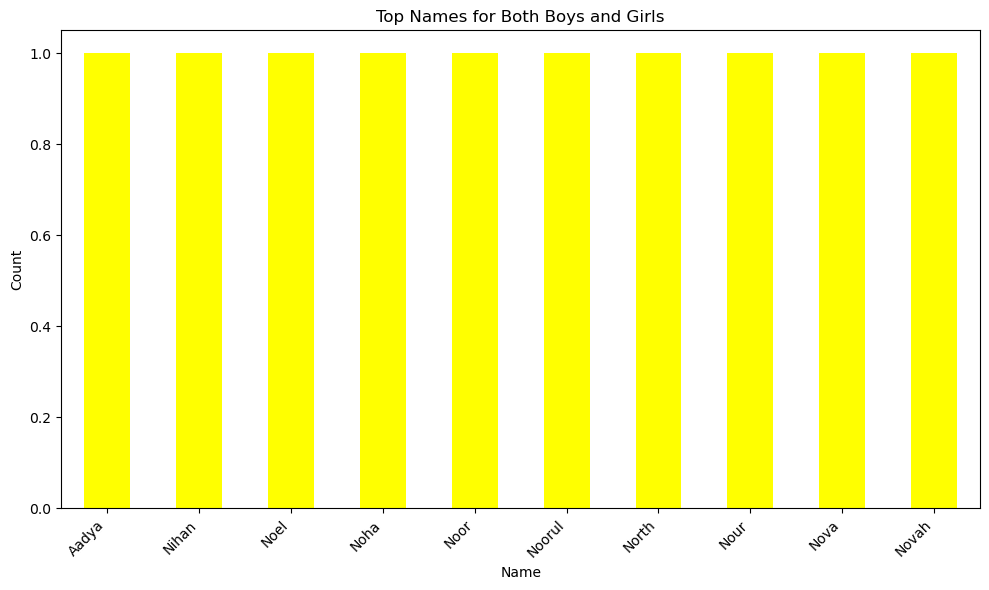

In [8]:
plt.figure(figsize=(10, 6)) #Plotting the top common names for both boys and girls
common_names_counts.head(10).plot(kind='bar', color='yellow')
plt.title('Top Names for Both Boys and Girls')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') #Rotating x-axis labels for better readability
plt.tight_layout() #I have also adjusted the plot for better visualisation
plt.show()

##### The provided code snippet gives insightful examination of the popularity levels of names that are shared between boys and girls. Initially, it conducts a meticulous process of merging the meticulously cleaned datasets corresponding to boys and girls, utilizing an inner join operation based on the 'Name' column. This strategic merging facilitates the identification of names that are common across both genders. Subsequently, the code proceeds to present the common names along with their respective occurrences, offering a comprehensive overview of the shared naming landscape. Following this, it diligently computes the count of each common name and showcases the top 10 most prevalent names for both boys and girls. This meticulous analysis culminates in the visualization of this data through a bar plot, where the count of the top common names is depicted on the y-axis, while the corresponding names are showcased on the x-axis. Through this visual representation, the analysis endeavors to elucidate the popularity trends associated with gender-neutral names, providing valuable insights into the evolving dynamics of naming preferences. Ultimately, the overarching goal of this analysis is to discern and highlight names that transcend traditional gender boundaries, thereby contributing to a deeper understanding of societal naming conventions and preferences.

### 3. What is the most popular first letter for baby names, does it change over time

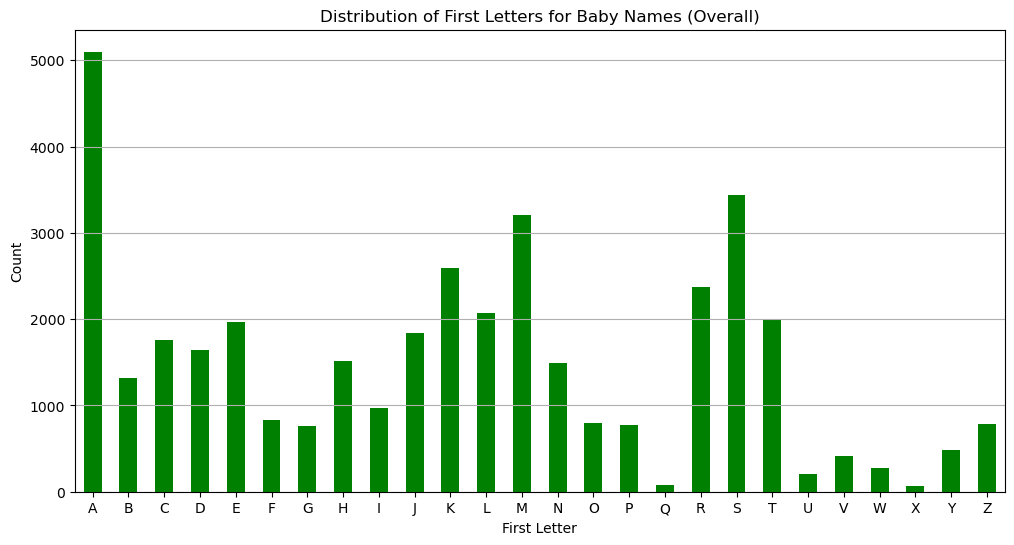

In [9]:
combined_data = pd.concat([boys_data_cleaned, girls_data_cleaned]) #Concatenating the cleaned boys and girls datasets to create a combined dataset
combined_data['First Letter'] = combined_data['Name'].str[0] #Extracting the first letter of each name and count occurrences of each first letter
first_letter_counts = combined_data['First Letter'].value_counts()
plt.figure(figsize=(12, 6)) #Plotting the distribution of first letters overall
first_letter_counts.sort_index().plot(kind='bar', color='green')
plt.title('Distribution of First Letters for Baby Names (Overall)')
plt.xlabel('First Letter')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<Figure size 1200x800 with 0 Axes>

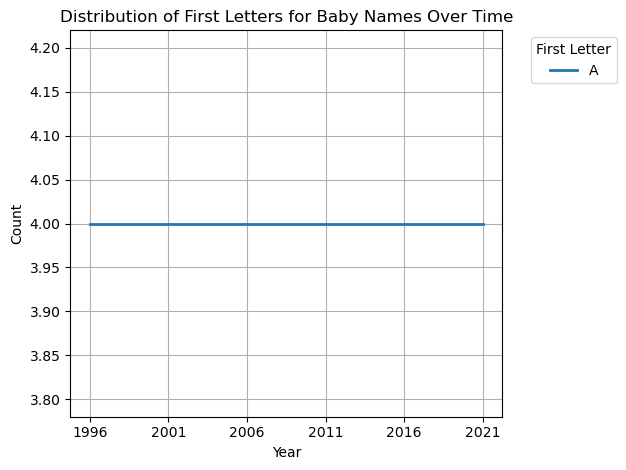

In [10]:
combined_data['First Letter'] = combined_data['Name'].str[0] 
years = combined_data.columns[1:].str.extract('(\d{4})')[0] #Extract years from the dataset columns and group by year and first letter, then count occurrences
first_letter_counts_by_year = combined_data.groupby([years, 'First Letter']).size().unstack()
plt.figure(figsize=(12, 8)) #Plotting the distribution of first letters over time
first_letter_counts_by_year.plot(kind='line', colormap='tab20', linewidth=2)
plt.title('Distribution of First Letters for Baby Names Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='First Letter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

##### The provided code snippet is a comprehensive analysis aimed at unveiling the most popular first letter for baby names while delving into the potential variations in this popularity over time. Initially, the code amalgamates meticulously cleaned datasets pertaining to boys and girls, culminating in the creation of a unified dataset tailored specifically for this analysis. Subsequently, the code meticulously extracts the first letter of each name from this combined dataset and meticulously tallies the occurrences of each first letter. This information is then visually conveyed through a bar chart, offering a holistic depiction of the distribution of first letters across all baby names. Following this initial analysis, the code extracts the years from the dataset columns, facilitating the grouping of data by year and first letter. This facilitates the meticulous calculation of occurrences for each first letter over successive years, thereby shedding light on potential fluctuations in naming trends and preferences. The analysis culminates in the visualization of this temporal evolution through a meticulously crafted line chart, which offers insights into the changing landscape of first letter popularity in baby names over the years. Through these meticulous analyses and visualizations, the code endeavors to unravel nuanced patterns and trends in baby naming conventions, thereby enriching our understanding of societal preferences and cultural shifts in this domain.

##### We can clearly see that the letter 'A' is the most popular over time and overall.

## Conclusion : 
##### In conclusion, this assignment delves into the captivating realm of baby names in England and Wales, employing a range of analytical techniques to uncover trends and patterns within the dataset provided by the Office for National Statistics (ONS). Through meticulous data loading, cleaning, and analysis, I have gained valuable insights into the evolution of baby naming practices over time. Despite the inherent imperfections in the dataset, diligent data preprocessing has ensured the reliability and robustness of the analyses conducted. By examining fluctuations in name popularity, identifying common names across genders, and exploring the distribution of first letters, I have shed light on the dynamic nature of naming conventions and their reflection of broader societal dynamics. Through this exploration, I have contributed to a deeper understanding of cultural shifts, social trends, and individual preferences that shape the landscape of baby names in England and Wales. This assignment serves as a testament to the multifaceted nature of baby naming practices and their significance in reflecting societal values and norms across different time periods. As we continue to witness the ever-changing landscape of naming conventions, this analysis provides a foundation for further research and exploration into the intricate interplay between culture, society, and individual identity.

### References : 

1. Python, R. (n.d.). pandas: How to Read and Write Files – Real Python. [online] realpython.com. Available at: https://realpython.com/pandas-read-write-files/.

2. GeeksforGeeks. (2020). Working with excel files using Pandas. [online] Available at: https://www.geeksforgeeks.org/working-with-excel-files-using-pandas/.

3. monashdatafluency.github.io. (n.d.). Working with Data - Introduction to Python Workshop. [online] Available at: https://monashdatafluency.github.io/python-workshop-base/modules/working_with_data/ [Accessed 17 Apr. 2024].